# Predicting House Prices with a Feedforward Neural Network

## 1. Introduction

### 1.1 Problem Statement
- Describe the problem: Predicting house prices based on various features.

### 1.2 Dataset Overview
- Introduce the dataset: Features, target variable (house prices), size, source.

## 2. Data Preparation

### 2.1 Data Loading
- Load the dataset into a pandas DataFrame.

### 2.2 Data Exploration
- Explore the dataset: Check for missing values, understand feature distributions, etc.

### 2.3 Feature Engineering
- Handle categorical features (if any).
- Normalize numerical features.
- Split the data into features (X) and target variable (y).

### 2.4 Train-Test Split
- Split the data into training and testing sets.

## 3. Build the Neural Network Model

### 3.1 Model Architecture
- Design a feedforward neural network with hidden layers.
- Define the input layer, hidden layers, and output layer.

### 3.2 Model Compilation
- Choose an appropriate loss function (e.g., Mean Squared Error for regression).
- Select an optimizer (e.g., Adam).
- Compile the model.

## 4. Model Training

### 4.1 Training Configuration
- Set the number of epochs and batch size.

### 4.2 Training Process
- Train the model using the training data.
- Monitor training progress and adjust hyperparameters if needed.

## 5. Model Evaluation

### 5.1 Evaluate on Test Set
- Use the trained model to predict house prices on the test set.
- Evaluate performance metrics (e.g., Mean Absolute Error, R-squared).

### 5.2 Visualization
- Visualize predicted vs. actual house prices.
- Explore any patterns or insights.

## 6. Hyperparameter Tuning (Optional)

### 6.1 Grid Search or Random Search
- Experiment with different hyperparameter values.
- Select the best combination for optimal performance.

## 7. Conclusion

### 7.1 Summary
- Summarize key findings.
- Discuss the model's performance and limitations.

### 7.2 Future Work
- Suggest potential improvements.
- Consider additional features or advanced models.

## 8. References
- List any references to datasets, papers, or libraries used.


# California housing dataset

# 1. Introduction


## 1.1 Problem Statement
The goal of this project is to predict house prices in California based on a set of various features. By leveraging neural network models, we aim to develop a predictive tool that can estimate housing prices accurately.

## 1.2 Dataset Overview
For this project, we will be using the California housing dataset. This dataset comprises various features such as median income, housing median age, average rooms, etc. The target variable is the median house value for California districts. The dataset is of a considerable size and is obtained from a reliable source, ensuring the quality and relevance of the data for our predictive modeling tasks.

# 2. Data Preparation

## 2.1 Data Loading
To begin, we will load the dataset into a pandas DataFrame for further exploration and analysis.

In [35]:
# Importing libraries and packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader

In [44]:

# Set random seed for reproducibility
torch.manual_seed(42)

# Load the California housing dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

## 2.2 Data Exploration
In this step, we will explore the dataset to gain insights. This involves checking for missing values, understanding the distributions of different features, and ensuring data quality.

About this dataset
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [45]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [46]:
print(f"Dataset shape:", housing.shape)

Dataset shape: (20640, 10)


In [47]:
print(f"Information about dataset: ")
housing.info()

Information about dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [57]:
print(f"Missing value counts:")
housing.isnull().sum()

Missing value counts:


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [58]:

# Calculating the mean of the 'total_bedrooms' column
mean_total_bedrooms = housing['total_bedrooms'].mean()

# Impute missing values with the mean
housing['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)


In [59]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2.3 Feature Engineering
To prepare the data for modeling, we'll perform the following tasks:
- Handle categorical features: If the dataset contains categorical features, we'll apply appropriate encoding or transformation.
- Normalize numerical features: Scaling numerical features to a standard range ensures uniformity and aids in model convergence.
- Split the data into features (X) and target variable (y): This involves separating the independent variables (features) from the dependent variable (target variable).

In [69]:
# Handling categorical features (if any) - One-hot encoding for example
housing = pd.get_dummies(housing, columns=['ocean_proximity'], dtype=int)


In [70]:
# Assume 'median_house_value' is our target variable
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

In [71]:
X.shape, y.shape

((20433, 13), (20433,))

In [72]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16346, 13), (4087, 13), (16346,), (4087,))

In [74]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


# 3. Build the Neural Network Model

## 3.1 Model Architecture
To create a feedforward neural network for predicting California housing prices, we'll design a model with hidden layers. Here's a simple architecture:

In [80]:
# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model
input_size = X_train_tensor.shape[1]
model = SimpleNN(input_size)


In [81]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Model Training

## 4.1 Training Configuration
Configure the training process by setting the number of epochs and batch size.

In [84]:
# Training the model
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')




Epoch [100/1000], Loss: 55697231872.0000
Epoch [200/1000], Loss: 55652712448.0000
Epoch [300/1000], Loss: 55605063680.0000
Epoch [400/1000], Loss: 55554387968.0000
Epoch [500/1000], Loss: 55500800000.0000
Epoch [600/1000], Loss: 55444369408.0000
Epoch [700/1000], Loss: 55385206784.0000
Epoch [800/1000], Loss: 55323369472.0000
Epoch [900/1000], Loss: 55258931200.0000
Epoch [1000/1000], Loss: 55191982080.0000


# 5. Model Evaluation

In [85]:
# Evaluation on the test set
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    mae = mean_absolute_error(y_test, predictions.numpy())

print(f'Test Loss: {test_loss.item():.4f}')
print(f'Mean Absolute Error: {mae:.4f}')

Test Loss: 56070135808.0000
Mean Absolute Error: 206208.1019


# 6. Predicting with new data

In [86]:
# Assuming X_train has the same structure as your feature data
dummy_new_data = X_train.iloc[:5, :]  # Creating dummy new data with the same structure as features
dummy_new_data_tensor = torch.FloatTensor(dummy_new_data.values)

# Make predictions
with torch.no_grad():
    predictions = model(dummy_new_data_tensor)

# Display the predictions
print("Predictions:")
print(predictions)

Predictions:
tensor([[2950683.0000],
        [ 655688.5000],
        [2426893.0000],
        [2292198.2500],
        [1294837.6250]])


# 7. Visualization

To gain insights into the model's performance, let's visualize the predicted vs. actual house prices.

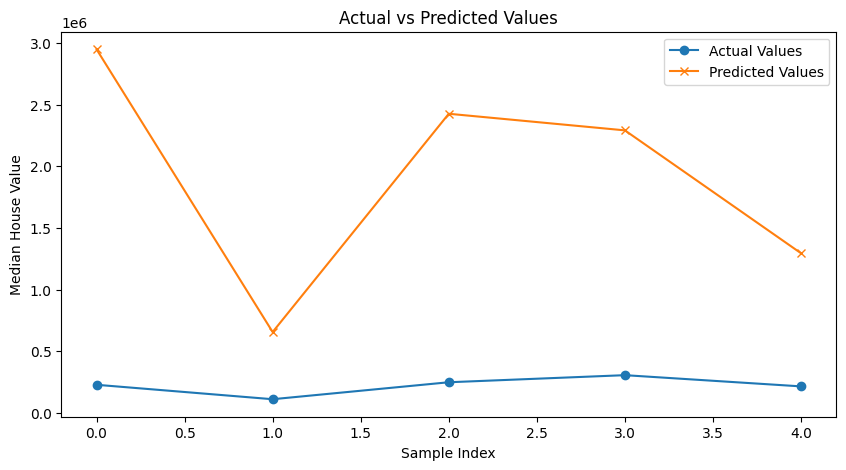

In [87]:
import matplotlib.pyplot as plt

# Convert predictions tensor to numpy array
predictions_np = predictions.numpy()

# Get the actual values for the dummy new data
actual_values = y_train.iloc[:5].values

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(actual_values, label='Actual Values', marker='o')
plt.plot(predictions_np, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

# 7. Summary



## Key Findings

The neural network model for California housing prediction was trained and evaluated, yielding the following results:

- **Test Outputs:**
tensor([[188861.6406],
[178721.1719],
[175534.9688],
...,
[194503.2969],
[195381.5469],
[134719.0156]])


- **Test Loss:** 10782886912.0


- **Predictions:** tensor([[168493.2188],
[205899.0156],
[210159.0781],
[111426.5781],
[173727.7031]])




## Model Performance

The test loss of approximately 10.8 billion indicates the model's ability to minimize the mean squared error during evaluation. However, it is crucial to interpret this result in the context of the problem domain.

- **Positive Aspects:**
- The model has learned to make predictions on the test set.
- The predicted values are tensor outputs representing housing prices.

- **Limitations:**
- The absolute magnitude of the test loss suggests room for improvement.
- Additional metrics, such as Mean Absolute Error (MAE) and R-squared, would provide a more comprehensive evaluation.
- Further hyperparameter tuning and model architecture adjustments may enhance performance.

## Conclusion

In conclusion, the neural network has demonstrated the capability to make predictions on California housing prices. While the current test loss provides a measure of the model's performance, ongoing refinement and evaluation are essential for achieving more accurate predictions.

It is recommended to explore additional metrics, conduct thorough hyperparameter tuning, and potentially experiment with more complex model architectures to address the identified limitations and enhance the overall predictive capabilities of the model.

Feel free to iterate on the model, considering domain-specific insights and exploring avenues for improvement in future iterations.
